## Prepare the Data for ML Algorithm

* Data Cleaning
* Data Normalization
* Tokenization
* Relabelling 

**Save the final dataframe for training models**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter 
import re
import emoji
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv(r"C:\Users\Mohamed Nabil\Documents\AIM Task\Data Fetching\dataset.csv")
df.head()

,Unnamed: 0,id,dialect,text
0,0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'dialect', 'text'], dtype='object')

In [4]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   dialect  458197 non-null  object
 1   text     458197 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


In [6]:
df.isnull().sum()

dialect    0
text       0
dtype: int64

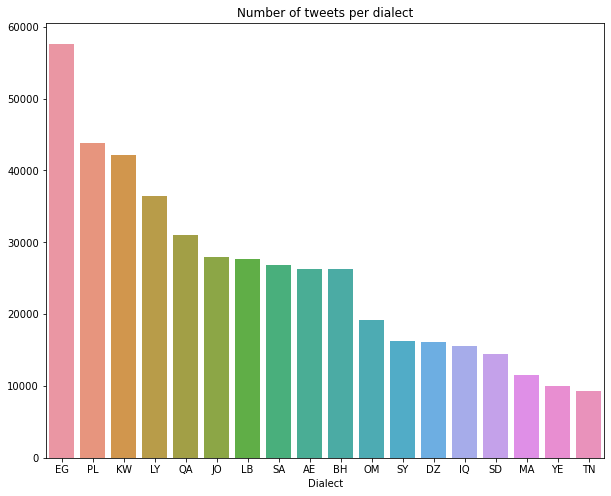

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x = df['dialect'].value_counts().index ,y =df['dialect'].value_counts().values)
plt.xlabel('Dialect')
plt.title('Number of tweets per dialect')
plt.show()

    As seen in the figure, The data is imbalanced ):

### Data Cleaning & Normlization

   *  Remove URLs 
   *  Remove Punctuatuions.
   *  Remove Elongation.
   *  Remove Usernames(mentions)
   *  Remove emoji
   *  Remove Special Characters
   *  Remove Numbers
   *  Remove Stop words

In [8]:
# First we define a list of arabic and english punctiations that we want to get rid of in our text
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words('arabic')

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    # Remove usernames
    text = re.sub(r'@[^\s]+','',text)
    
    # Remove URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    
    # Remove None arabic 
    text = re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text)
    
    # Remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # Remove repeating character
    text = re.sub(r'(.)\1+', r'\1', text)

    # Remove tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #Remove elongation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    
    # Remove emojis
    text=  emoji.demojize(text)
    text= re.sub(r'(:[!_\-\w]+:)', ' ', text)
    
    # Remove numbers
    text = ''.join(i for i in text if not i.isdigit())
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

### Apply this function to clean data

In [9]:
df['clean_text'] = df['text'].apply(lambda x: preprocess(x))

In [10]:
df.head()

,dialect,text,clean_text
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,بالنهايه ينتفض يغير
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني محسوب علي البشر حيونه وحشيه وتطلبون الغرب...
2,IQ,@KanaanRema مبين من كلامه خليجي,مبين كلامه خليجي
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين الغيبه اخ محمد


### Check missing data

In [11]:
df.isnull().sum()

dialect       0
text          0
clean_text    0
dtype: int64

### check duplicated

In [12]:
df['text'].duplicated().sum()

0

### Tokenization
Tokenizers divide strings into lists of substrings

In [13]:
df['tokenizer'] = df['clean_text'].apply(lambda x : word_tokenize(x))

In [14]:
df

,dialect,text,clean_text,tokenizer
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,بالنهايه ينتفض يغير,"[بالنهايه, ينتفض, يغير]"
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني محسوب علي البشر حيونه وحشيه وتطلبون الغرب...,"[يعني, محسوب, علي, البشر, حيونه, وحشيه, وتطلبو..."
2,IQ,@KanaanRema مبين من كلامه خليجي,مبين كلامه خليجي,"[مبين, كلامه, خليجي]"
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه,"[يسلملي, مرورك, وروحك, الحلوه]"
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين الغيبه اخ محمد,"[وين, الغيبه, اخ, محمد]"
...,...,...,...,...
458192,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,مبسوطين منك الي باسطانا,"[مبسوطين, منك, الي, باسطانا]"
458193,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,واله ماينده ابش يختي,"[واله, ماينده, ابش, يختي]"
458194,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,"[شو, عملنا, حنا, تهربي, منا, احنا, مساكين, ليش..."
458195,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,اله يبارك وبالعافيه,"[اله, يبارك, وبالعافيه]"


    the 10 most frequent words in each dialect

In [15]:
def top_words(dialect,n=10): 
    words = [word for tokens in df[df['dialect']== dialect]['tokenizer'] for word in tokens]
    counter = Counter(words)
    indicies =[] 
    counts =[]
    words = []
    for  i in counter.most_common(n):
        words.append(i[0])
        indicies.append(i[0][::-1])
        counts.append(i[1])
    return words

In [16]:
top_words('EG' )

['الي', 'مش', 'علي', 'ده', 'انا', 'دي', 'ايه', 'ان', 'كده', 'مصر']

In [17]:
top_words('SA' )

['الي', 'اله', 'علي', 'واله', 'انا', 'ان', 'وش', 'شي', 'اذا', 'الا']

In [18]:
top_words('SY' )

['الي', 'اله', 'علي', 'شو', 'عم', 'انا', 'شي', 'مو', 'انو', 'واله']

In [19]:
top_words('TN' )

['الي', 'علي', 'اله', 'انا', 'مش', 'تونس', 'باش', 'ربي', 'واله', 'برشا']

### Relabelling
To start i want to train a model that will identify broader areas of dialectical similarity:
    
    I have put together these groups of dialects. 

**Nile_Basin**: `Egypt` & `Sudan`

**Gulf**: `Saudi Arabia` & `Oman` & `Arab Emirates` & `Bahrain` & `Qatar` & `Kuwait` & `Iraq` & `Yemen`

**Levantine**: `Syria` & `Jordan` & `Palestine` & `Lebanon`

**Maghrebi**: `Algeria` & `Morocco` & `Tunisia` & `Libya`



In [20]:
df.dialect.unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [21]:
def region(dialect):
    if dialect in ['SA', 'OM', 'AE','BH', 'QA','KW','IQ','YE']:
        return 'Gulf'
    elif dialect in ['EG', 'SD']:
        return 'Nile_Basin'
    elif dialect in ['SY','JO','PL', 'LB']:
        return 'Levant'
    elif dialect in ['DZ','MA','TN', 'LY']:
        return 'Maghreb'
    else:
        return np.nan

In [22]:
df['region_dialect'] = df['dialect'].apply(region)

In [23]:
df

,dialect,text,clean_text,tokenizer,region_dialect
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,بالنهايه ينتفض يغير,"[بالنهايه, ينتفض, يغير]",Gulf
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني محسوب علي البشر حيونه وحشيه وتطلبون الغرب...,"[يعني, محسوب, علي, البشر, حيونه, وحشيه, وتطلبو...",Gulf
2,IQ,@KanaanRema مبين من كلامه خليجي,مبين كلامه خليجي,"[مبين, كلامه, خليجي]",Gulf
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه,"[يسلملي, مرورك, وروحك, الحلوه]",Gulf
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين الغيبه اخ محمد,"[وين, الغيبه, اخ, محمد]",Gulf
...,...,...,...,...,...
458192,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,مبسوطين منك الي باسطانا,"[مبسوطين, منك, الي, باسطانا]",Gulf
458193,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,واله ماينده ابش يختي,"[واله, ماينده, ابش, يختي]",Gulf
458194,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,"[شو, عملنا, حنا, تهربي, منا, احنا, مساكين, ليش...",Gulf
458195,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,اله يبارك وبالعافيه,"[اله, يبارك, وبالعافيه]",Gulf


In [24]:
df.to_csv('clean_dataset.csv')

### Resources
* Preprocessing Arabic text on social media <a href="https://www.sciencedirect.com/science/article/pii/S2405844021002966" title="Learn Markdown">Research Article</a>

* Machine learning advancements in Arabic NLP <a href="https://towardsdatascience.com/machine-learning-advancements-in-arabic-nlp-c6982b2f602b">here</a>

* Arabic NLP: Unique Challenges and Their Solutions <a href="https://towardsdatascience.com/arabic-nlp-unique-challenges-and-their-solutions-d99e8a87893d">here</a>

